# Double 7's (Short Term Trading Strategies that Work)

    1. The SPY is above its 200-day moving average
    2. The SPY closes at a X-day low, buy.
    3. If the SPY closes at a X-day high, sell your long position.
    
    (optimize for number of days)

In [1]:
# use future imports for python 3.x forward compatibility
from __future__ import print_function
from __future__ import unicode_literals
from __future__ import division
from __future__ import absolute_import

# other imports
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from talib.abstract import *

# project imports
import pinkfish as pf
import strategy

# format price data
pd.options.display.float_format = '{:0.2f}'.format

%matplotlib inline

In [2]:
# set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

Some global data

In [3]:
#symbol = '^GSPC'
symbol = 'SPY'
#symbol = 'DIA'
#symbol = 'QQQ'
#symbol = 'IWM'
#symbol = 'TLT'
#symbol = 'GLD'
#symbol = 'AAPL'
#symbol = 'BBRY'
#symbol = 'GDX'
capital = 10000
start = datetime.datetime(1900, 1, 1)
#end = datetime.datetime(2010, 12, 1)
end = datetime.datetime.now()

Define high low trade periods

In [4]:
# this is really SMAs
periods = range(20, 120, 10)
periods = [str(period) for period in periods]

Run Strategy

In [5]:
strategies = pd.Series()
for period in periods:
    print("{0}".format(period), end=" ")
    strategies[period] = strategy.Strategy(symbol, capital, start, end, period=8, sma=int(period))
    strategies[period].run()
    strategies[period].tlog, strategies[period].dbal = strategies[period].get_logs()
    strategies[period].stats = strategies[period].get_stats()

20 30 40 50 60 70 80 90 100 110 

Summarize results

In [6]:
metrics = ('annual_return_rate',
           'max_closed_out_drawdown',
           'drawdown_annualized_return',
           'drawdown_recovery',
           'best_month',
           'worst_month',
           'sharpe_ratio',
           'sortino_ratio',
           'monthly_std',
           'pct_time_in_market',
           'total_num_trades',
           'pct_profitable_trades',
           'avg_points')

df = strategy.summary(strategies, *metrics)
df

,20,30,40,50,60,70,80,90,100,110
annual_return_rate,8.66,9.46,9.01,9.35,9.35,9.20,9.39,8.70,8.52,8.68
max_closed_out_drawdown,-28.41,-20.77,-26.91,-15.48,-15.48,-14.79,-14.02,-17.30,-19.96,-22.74
drawdown_annualized_return,-3.28,-2.20,-2.99,-1.66,-1.66,-1.61,-1.49,-1.99,-2.34,-2.62
drawdown_recovery,-2.27,-2.27,-2.27,-1.84,-1.84,-2.61,-0.05,-2.61,-2.61,-2.61
best_month,12.88,12.88,12.88,12.88,12.88,12.88,12.88,12.89,12.88,12.88
worst_month,-13.90,-13.89,-13.89,-12.29,-12.29,-12.28,-12.27,-12.29,-12.29,-12.28
sharpe_ratio,0.84,0.90,0.87,0.92,0.92,0.91,0.92,0.86,0.85,0.87
sortino_ratio,0.66,0.72,0.69,0.73,0.73,0.71,0.73,0.68,0.67,0.68
monthly_std,2.33,2.35,2.33,2.27,2.27,2.25,2.26,2.29,2.26,2.22
pct_time_in_market,32.14,32.67,32.64,32.34,32.34,31.96,32.06,32.11,31.75,31.23


Bar graphs

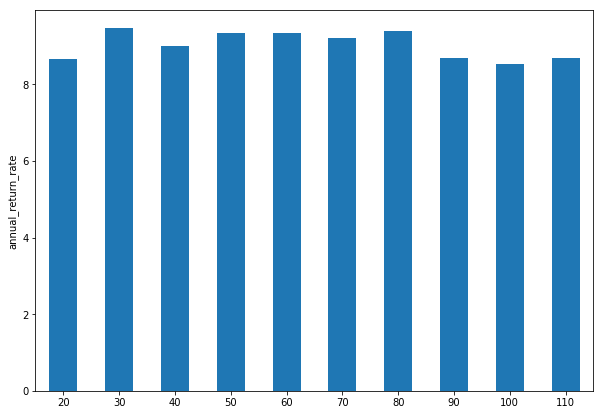

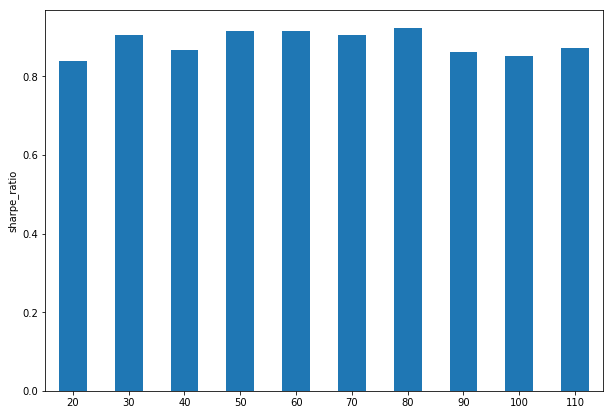

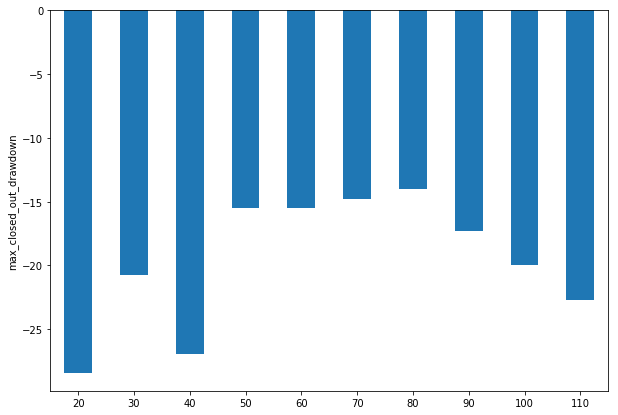

In [7]:
strategy.plot_bar_graph(df, 'annual_return_rate')
strategy.plot_bar_graph(df, 'sharpe_ratio')
strategy.plot_bar_graph(df, 'max_closed_out_drawdown')

Run Benchmark

In [8]:
s = strategies[periods[0]]
benchmark = pf.Benchmark(symbol, capital, s._start, s._end)
benchmark.run()
benchmark.tlog, benchmark.dbal = benchmark.get_logs()
benchmark.stats = benchmark.get_stats()

1993-11-11 00:00:00 BUY  215 SPY @ 46.38
2020-02-14 00:00:00 SELL 215 SPY @ 337.60


Equity curve

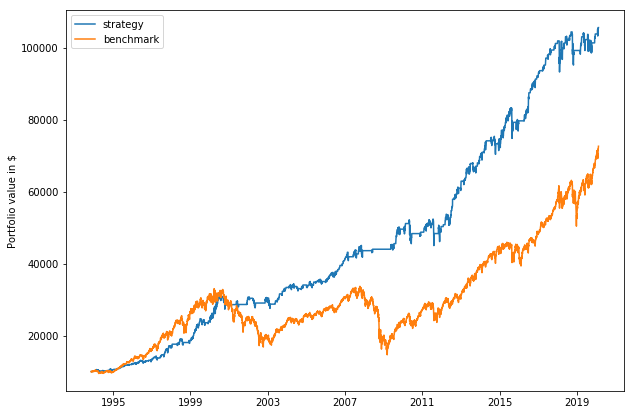

In [9]:
pf.plot_equity_curve(strategies['80'].dbal, benchmark=benchmark.dbal)